In [2]:
#Import necessary libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
#Import AhR Data
AHR_Master= pd.read_csv('../02_CleanUp_BED_File/MMU_Chromosomal_Location_of_AHR_Binding_Sig0.05.txt', 
                            delimiter = '\t',
                            index_col=None)

AHR_Master

,Active_Region,Chr,Start,End,Length,Dist_to_Start,Fold-Change,FDR,Gene_Biotype,Gene_ID,Transcript_ID,Gene_Name,Gene_Name2,NR_Annotation
0,19350,chr1,3326148,3326272,124,415511.0,1.61,0.080145,NM,Xkr4,Xkr4,Xkr4,NM_001011874(Non-Dups),NaN
1,18914,chr1,3391423,3391572,149,350223.5,1.76,0.067137,NM,Xkr4,Xkr4,Xkr4,NM_001011874(Non-Dups),NaN
2,12751,chr1,3493323,3493697,374,248211.0,1.93,0.002963,NM,Xkr4,Xkr4,Xkr4,NM_001011874(Non-Dups),NaN
3,4100,chr1,3547998,3548297,299,193573.5,2.87,0.000000,NM,Xkr4,Xkr4,Xkr4,NM_001011874(Non-Dups),NaN
4,4100,chr1,3547998,3548297,299,11337.5,2.87,0.000000,antisense,Gm1992,Gm1992,Gm1992,Gm1992,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45111,22408,chrY,29559970,29560069,99,NaN,1.54,0.213942,NaN,NaN,NaN,NaN,NaN,NaN
45112,21376,chrY,40828445,40828644,199,NaN,1.54,0.159602,NaN,NaN,NaN,NaN,NaN,NaN
45113,21478,chrY,61734478,61734577,99,NaN,1.60,0.163845,NaN,NaN,NaN,NaN,NaN,NaN
45114,17186,chrY,90738569,90738718,149,NaN,1.73,0.032510,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
AHR_Master['Gene_Biotype'].unique()

array(['NM', 'antisense', 'lncRNA', nan, 'NM#NR', 'lincRNA', 'NR',
       'lncOfInterest'], dtype=object)

In [5]:
AHR_in_lncRNAs = AHR_Master[(AHR_Master['Gene_Biotype'] == 'lncRNA') | 
                            (AHR_Master['Gene_Biotype'] == 'antisense') |
                            (AHR_Master['Gene_Biotype'] == 'lincRNA') |
                            (AHR_Master['Gene_Biotype'] == 'NR')]
AHR_in_lncRNAs['Gene_Name'].nunique()
                    

12844

In [6]:
AHR_in_lncRNAs

,Active_Region,Chr,Start,End,Length,Dist_to_Start,Fold-Change,FDR,Gene_Biotype,Gene_ID,Transcript_ID,Gene_Name,Gene_Name2,NR_Annotation
4,4100,chr1,3547998,3548297,299,11337.5,2.87,0.000000,antisense,Gm1992,Gm1992,Gm1992,Gm1992,NaN
7,19638,chr1,4566648,4566847,199,-3211.5,1.71,0.089181,lncRNA,lnc_inter_chr1_3,lnc_inter_chr1_3,lnc3,lnc_inter_chr1_3,lnc3
9,19638,chr1,4566648,4566847,199,-6146.5,1.71,0.089181,lncRNA,lnc_inter_chr1_15567,lnc_inter_chr1_15567,lnc15567,lnc_inter_chr1_15567,lnc15567
10,14169,chr1,4584173,4584347,174,-1586.0,1.83,0.006378,lncRNA,lnc_inter_chr1_15568,lnc_inter_chr1_15568,lnc15568,lnc_inter_chr1_15568,lnc15568
11,14169,chr1,4584173,4584347,174,-3827.0,1.83,0.006378,lncRNA,lnc_inter_chr1_15569,lnc_inter_chr1_15569,lnc15569,lnc_inter_chr1_15569,lnc15569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45067,9400,chrX,153999421,153999670,249,-6879.5,2.09,0.000101,lncRNA,lnc_inter_chrX_50407,lnc_inter_chrX_50407,lnc50407,lnc_inter_chrX_50407,lnc50407
45069,7499,chrX,158920446,158920970,524,-1398.0,2.32,0.000000,lncRNA,lnc_inter_chrX_50431,lnc_inter_chrX_50431,lnc50431,lnc_inter_chrX_50431,lnc50431
45091,1820,chrX,163228646,163228995,349,-8596.5,5.47,0.000000,lncRNA,lnc_as_chrX_50446,lnc_as_chrX_50446,lnc50446,lnc_as_chrX_50446,lnc50446
45093,18838,chrX,163229121,163229370,249,-9021.5,1.63,0.064324,lncRNA,lnc_as_chrX_50446,lnc_as_chrX_50446,lnc50446,lnc_as_chrX_50446,lnc50446


In [7]:
AHR_in_proteins = AHR_Master[(AHR_Master['Gene_Biotype'] == 'NM#NR') |
                            (AHR_Master['Gene_Biotype'] == 'NM')]
AHR_in_proteins['Gene_Name'].nunique()

8433

In [8]:
AHR_in_proteins

,Active_Region,Chr,Start,End,Length,Dist_to_Start,Fold-Change,FDR,Gene_Biotype,Gene_ID,Transcript_ID,Gene_Name,Gene_Name2,NR_Annotation
0,19350,chr1,3326148,3326272,124,415511.0,1.61,0.080145,NM,Xkr4,Xkr4,Xkr4,NM_001011874(Non-Dups),NaN
1,18914,chr1,3391423,3391572,149,350223.5,1.76,0.067137,NM,Xkr4,Xkr4,Xkr4,NM_001011874(Non-Dups),NaN
2,12751,chr1,3493323,3493697,374,248211.0,1.93,0.002963,NM,Xkr4,Xkr4,Xkr4,NM_001011874(Non-Dups),NaN
3,4100,chr1,3547998,3548297,299,193573.5,2.87,0.000000,NM,Xkr4,Xkr4,Xkr4,NM_001011874(Non-Dups),NaN
5,6320,chr1,3585223,3585547,324,156336.0,2.53,0.000000,NM,Xkr4,Xkr4,Xkr4,NM_001011874(Non-Dups),NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45104,4921,chrX,168646896,168647120,224,178813.0,2.94,0.000000,NM,Mid1,Mid1,Mid1,NM_010797#NM_001290506#NM_001290512#NM_0012905...,NaN
45105,20609,chrX,168675196,168675320,124,207063.0,1.58,0.124916,NM,Mid1,Mid1,Mid1,NM_010797#NM_001290506#NM_001290512#NM_0012905...,NaN
45107,12387,chrX,168763996,168764195,199,295900.5,2.02,0.002412,NM,Mid1,Mid1,Mid1,NM_010797#NM_001290506#NM_001290512#NM_0012905...,NaN
45108,7713,chrY,931650,931974,324,34024.0,2.27,0.000000,NM,Kdm5d,Kdm5d,Kdm5d,NM_011419(Non-Dups),NaN


In [9]:
import os

directory = 'Figures'

# Check if the directory exists
if not os.path.exists(directory):
    # If it doesn't exist, create it
    os.makedirs(directory)

/tmp/local/51093422/ipykernel_1816633/870745942.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AHR_in_lncRNAs['distance_kbp'] = AHR_in_lncRNAs['Dist_to_Start'] / 1000


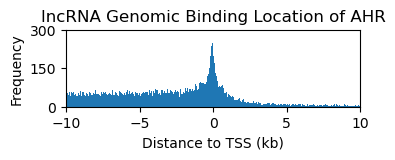

In [14]:
# Convert distances to kilobase pairs
AHR_in_lncRNAs['distance_kbp'] = AHR_in_lncRNAs['Dist_to_Start'] / 1000

# Filter distances to keep values between -10 and 10
filtered_distances = AHR_in_lncRNAs[(AHR_in_lncRNAs['distance_kbp'] >= -10) & (AHR_in_lncRNAs['distance_kbp'] <= 10)]['distance_kbp'].dropna()

# Plot histogram
plt.figure(figsize=(3.8, 1))
plt.hist(filtered_distances, bins=500)# , color='skyblue', edgecolor='black')
plt.xlabel('Distance to TSS (kb)')
plt.ylabel('Frequency')
plt.title('lncRNA Genomic Binding Location of AHR')
plt.xlim(-10, 10)
plt.ylim(0,300)
plt.yticks([0, 150, 300])

# Save plot as PDF
plt.savefig('./Figures/AHR_Binding_Histogram_Small_lncRNAs.pdf', format='pdf')

plt.show()

/tmp/local/51093422/ipykernel_1816633/3269432618.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AHR_in_proteins['distance_kbp'] = AHR_in_proteins['Dist_to_Start'] / 1000


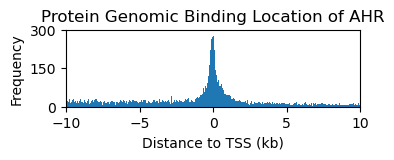

In [15]:
# Convert distances to kilobase pairs
AHR_in_proteins['distance_kbp'] = AHR_in_proteins['Dist_to_Start'] / 1000

# Filter distances to keep values between -10 and 10
filtered_distances = AHR_in_proteins[(AHR_in_proteins['distance_kbp'] >= -10) & (AHR_in_proteins['distance_kbp'] <= 10)]['distance_kbp'].dropna()

# Plot histogram
plt.figure(figsize=(3.8, 1))
plt.hist(filtered_distances, bins=500)# , color='skyblue', edgecolor='black')
plt.xlabel('Distance to TSS (kb)')
plt.ylabel('Frequency')
plt.title('Protein Genomic Binding Location of AHR')
plt.xlim(-10, 10)
plt.ylim(0,300)
plt.yticks([0, 150, 300])

# Save plot as PDF
plt.savefig('./Figures/AHR_Binding_Histogram_Small_Proteins.pdf', format='pdf')

plt.show()